### Given the problem:
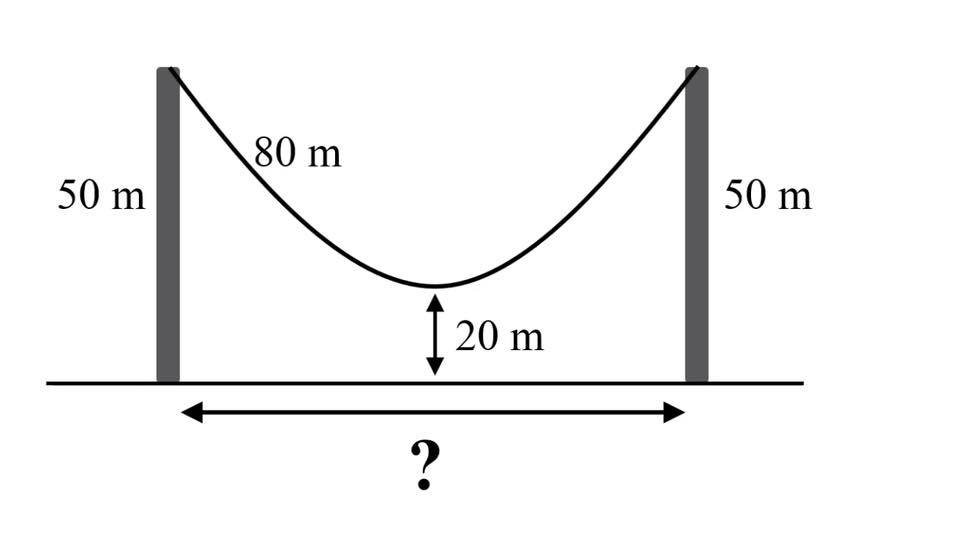

> Find the distance between poles. 

## Notes and observations
>* The shape of a hanging cable or a rope represents a so-called catenary line (see: https://en.wikipedia.org/wiki/Catenary ).
>* For caternary lines, critical parameters are: 
>  - L, Length of the cable
>  - a, or Sag - the vertical distance between hanging points and the lowest point of the cable
>* Assume that the minimum point is located at (0,0) coordinate. 
>* The poles are positioned at -Xi and Xi, the distance between poles = 2*Xi
>* The pole height can be viewed as the sag + some arbitrary, "slack" value, so that Pole height = sag + slack. 
>* Note that when the sag value = 1/2 of the cable's length, then the cable is hanging freely, the distance between poles = 0. 
>* We need to find Xi, at which the lengh of the rope = L (80m)

In [1]:
## Call few libraries we need for calculation and visualization
import numpy as np
from matplotlib import pyplot as plt

In [2]:
## Let's input what we know:
h_pole = 50     # Height of the pole
l_rope = 80     # Length of the rope
h_slack = 20    # Height of the sag point from the ground

In [3]:
## Let's figure out what we want to know:
h_sag = h_pole - h_slack      # Sag value
x0,y0 = (0,0)                 # Assign coordinates of the lowest point of the rope

## Bring catenary equations into the action:
> The catenary equation:  
$$ y = a*cosh\left(\frac{x}{a}\right)$$  

> **Find the parameter a**:
$$ a = \frac{\frac{1}{4} L^2 - h^2} {2h}$$
> where:
>  - **_L_** is the length of the catenary line;  
>  - **_h_** is the vertical distance between the highest and lowest points of the catenary line, "sag".

> **Find the distance between poles, H**:
$$ H = 2a*arcosh\left(\frac{h+a}{a}\right)$$
> where:
>  - **_a_** is a parameter of the catenary equation;  
>  - **_h_** is the vertical distance between the highest and lowest points of the catenary line, "sag".

> **Find the length of the catenary line, L**:
$$ L = 2a*sinh\left(\frac{H}{2a}\right)$$
> where:
>  - **_a_** is a parameter of the catenary equation;  
>  - **_H_** is the distance between left and right poles

In [4]:
def caternary_a_given_Lh(L,h):
    # Find a, the parameter of the caternary equation
    # L is the cable length   
    # h is the value of sag, or the vertical distance between the pole's endpoint and the lowest point of the cable.

    if h == 0:                       # Case when the cable is parallel to x-axis
        a = np.inf   
    elif 2*h > L:                    # Case when the sag is greater than the half of the cable's length
        a = None
    else:
        a = (1/4 * L**2 - h**2)/(2*h)
    return a

def caternary_H_givenLa(L,a):
    # Find H,  the distance between poles
    # L is the length of the cable, a - parameter of a caternary curve
    if a  == 0:
        H = 0
    elif a == np.inf:
        H = L
    else:
        H = 2*a*np.arcsinh(L/(2*a))
    return H



In [5]:
L = 80                           # Length of the cable
P = 50                           # Pole height
d = 20                           # Distance from the ground to the vertex

## Now perform necessary calculations:

h = P - d                        # Sag
a = caternary_a_given_Lh(L,h)    # Calculate the catenary parameter
H = caternary_H_givenLa(L,a)     # Calculate the distance between poles

# Ouput the results:
print('The sag value: {}'.format(h))
print('The catenary parameter: {}'.format(a))
print('The distance between poles: {}'.format(H))

The sag value: 30
The catenary parameter: 11.666666666666666
The distance between poles: 45.40457014462398


In [6]:
def caternary_points(x_min, x_max, a, n_steps=20, Ymin=10,Ymax=50):
    xx = np.linspace(x_min,x_max, n_steps)
    if a == 0:                      #Correction if the cable is freely hanging with x_min=x_max
        xx = np.array([0,0])
        yy = np.array([Ymin,Ymax])
    elif a == np.inf:
        xx = np.array([x_min, x_max])
        yy = np.array([Ymax, Ymax])
    else:
        yy = [a*np.cosh(x/a) for x in xx]
    return xx,yy
    

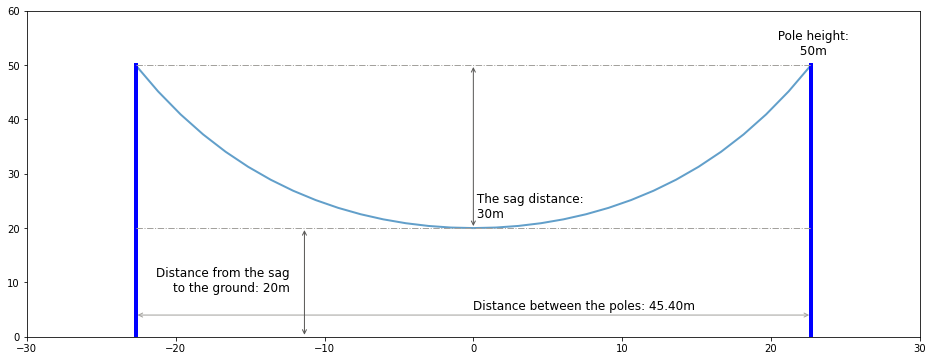

In [7]:
### Now, let's visualize the results

### Examine several catenary curves
fig = plt.figure(figsize=(16,6))

xmax = H/2
xx,yy = caternary_points(-xmax,xmax, a, n_steps=31)
ymax = max(yy)

slack = ymax - P
yy = yy - slack

ymin = min(yy)

p = plt.plot(xx,yy,'-', alpha=0.7, lw=2)
plt.plot([-xmax,-xmax],[0,P], lw=4, c='blue')                           # Left pole
plt.plot([xmax,xmax],[0,P], lw=4, c='blue')                             # Right pole

plt.plot([-xmax,xmax],[P,P], lw=1,ls='-.', c='#a3a19d')                 # Pole height
plt.plot([-xmax,xmax],[ymin,ymin], lw=1,ls='-.', c='#a3a19d')           # Slack height

plt.annotate('Distance between the poles: {:.2f}m'.format(H), xy=(0,P/10),\
            fontsize=12, horizontalalignment='left')

plt.annotate(' Pole height:\n {:.0f}m'.format(P), xy=(xmax,P+2),\
            fontsize=12, horizontalalignment='center')

plt.annotate("",xy=(-xmax, P/10-1), xycoords='data',
                xytext=(xmax, P/10-1),arrowprops=dict(arrowstyle="<->",color='#a3a19d',
                connectionstyle="arc3"))

plt.annotate("",xy=(-xmax/2, 0), xycoords='data',
                xytext=(-xmax/2, ymin),arrowprops=dict(arrowstyle="<->",color='#595856',
                connectionstyle="arc3,rad=0")) 

plt.annotate('Distance from the sag\nto the ground: {:.0f}m'.format(ymin), xy=(-xmax/2-1,np.abs(slack)),\
             horizontalalignment='right', fontsize=12)


plt.annotate("",xy=(0, P), xycoords='data',
                xytext=(0, ymin),arrowprops=dict(arrowstyle="<->",color='#595856',
                connectionstyle="arc3,rad=0")) 

plt.annotate(' The sag distance:\n {:.0f}m'.format(ymax-ymin-slack), xy=(0,ymin+2), fontsize=12)
    
plt.ylim(0,60)
plt.xlim(-30,30)
plt.show()

In [8]:
### Add dynamic controls
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [28]:
def f(x):
    return x
d_widget = interactive(f, x=widgets.IntSlider(min=0, max=int(L/2), step=1, value=30));
display(d_widget)

interactive(children=(IntSlider(value=30, description='x', max=40), Output()), _dom_classes=('widget-interact'…

In [61]:
def draw_catenary(distance_from_sag):
    L = 80                           # Length of the cable
    P = 50                           # Pole height

    ## Now perform necessary calculations:

    h = P - distance_from_sag                        # Sag
    ddd = distance_from_sag
 
    a = caternary_a_given_Lh(L,h)    # Calculate the catenary parameter
    if a == None:
        print('There is no catenary solution for L={}, P={} and d={}'.format(L,P,ddd))
        return None
    
    H = caternary_H_givenLa(L,a)     # Calculate the distance between poles

    xmax = H/2
    xx,yy = caternary_points(-xmax,xmax, a, n_steps=31)
    ymax = max(yy)

    slack = ymax - P
    yy = yy - slack
    
    ymin = min(yy)
    
    fig = plt.figure(figsize=(16,6))
    p = plt.plot(xx,yy,'-', alpha=0.7, lw=2)
    plt.plot([-xmax,-xmax],[0,P], lw=4, c='blue')                           # Left pole
    plt.plot([xmax,xmax],[0,P], lw=4, c='blue')                             # Right pole

    plt.plot([-xmax,xmax],[P,P], lw=1,ls='-.', c='#a3a19d')                 # Pole height
    plt.plot([-xmax,xmax],[ymin,ymin], lw=1,ls='-.', c='#a3a19d')           # Slack height

    plt.annotate('Distance between the poles: {:.2f}m'.format(H), xy=(0,P/10),\
                fontsize=12, horizontalalignment='left')

    plt.annotate(' Pole height:\n {:.0f}m'.format(P), xy=(xmax,P+2),\
                fontsize=12, horizontalalignment='center')

    plt.annotate("",xy=(-xmax, P/10-1), xycoords='data',
                    xytext=(xmax, P/10-1),arrowprops=dict(arrowstyle="<->",color='#a3a19d',
                    connectionstyle="arc3"))

    plt.annotate("",xy=(-xmax/2, 0), xycoords='data',
                    xytext=(-xmax/2, ymin),arrowprops=dict(arrowstyle="<->",color='#595856',
                    connectionstyle="arc3,rad=0")) 

    plt.annotate('Distance from the sag\nto the ground: {:.0f}m'.format(ymin), xy=(-55,max(5,ymin/2)),\
                 horizontalalignment='left', fontsize=12)


    plt.annotate("",xy=(0, P), xycoords='data',
                    xytext=(0, ymin),arrowprops=dict(arrowstyle="<->",color='#595856',
                    connectionstyle="arc3,rad=0")) 

    plt.annotate(' The sag distance:\n {:.0f}m'.format(ymax-ymin-slack), xy=(0,ymin+2), fontsize=12)

    plt.ylim(0,60)
    plt.xlim(-60,60)
    plt.show()
    

In [62]:
d_widget = interactive(draw_catenary, distance_from_sag=widgets.IntSlider(min=1, max=50, step=1, value=30));
display(d_widget)

interactive(children=(IntSlider(value=30, description='distance_from_sag', max=50, min=1), Output()), _dom_cla…